In [ ]:
import os
username="DonizetiJr"
os.environ["GITHUB_USER"] = username

!git config --global user.name "${GITHUB_USER}"

In [ ]:
import os
from getpass import getpass

usermail = getpass()
os.environ["GITHUB_MAIL"] = usermail

!git config --global user.email "${GITHUB_MAIL}"

··········


In [ ]:
import os
from getpass import getpass

usertoken = getpass()
os.environ["GITHUB_TOKEN"] = usertoken

··········


In [ ]:
!git clone https://github.com/DonizetiJr/netflix-imdb.git # insira o link do seu repositório remoto

Cloning into 'netflix-imdb'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [ ]:
%cd /content/netflix-imdb

/content/netflix-imdb


In [ ]:
!git status

# **00. Intro & Import Data**
This project leverages the Netflix TV Shows and Movies dataset to analyze IMDb ratings and their distribution across various titles on the platform. The dataset offers detailed information, including title names, type, release year, age ratings, runtime, IMDb scores, and votes, ensuring a rich foundation for exploration. By examining these elements, I aim to uncover patterns in viewer ratings and assess the popularity and reception of Netflix content.

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

import graphviz
from sklearn import tree

**Load Data**

In [ ]:
# Download Data
!kaggle datasets download -d thedevastator/netflix-imdb-scores

Dataset URL: https://www.kaggle.com/datasets/thedevastator/netflix-imdb-scores
License(s): other
100% 699k/699k [00:00<00:00, 1.03MB/s]
100% 699k/699k [00:00<00:00, 1.03MB/s]


In [ ]:
!unzip netflix-imdb-scores.zip

Archive:  netflix-imdb-scores.zip
  inflating: Netflix TV Shows and Movies.csv  


In [ ]:
# Load the dataset
df = pd.read_csv('Netflix TV Shows and Movies.csv')

# Display the first few rows of the dataset
df.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


# **01. Data Cleaning**

In [ ]:
# DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


In [ ]:
df.shape

(5283, 11)

In [ ]:
# Drop unusable information
df = df.drop(columns=['index','id','imdb_id'])

## **01.1 Missing Data**

In [ ]:
df = df.dropna()
df.head()

,title,type,description,release_year,age_certification,runtime,imdb_score,imdb_votes
0,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,8.3,795222.0
1,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,8.2,530877.0
2,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,8.0,392419.0
3,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,8.1,391942.0
4,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,8.8,72895.0


## **01.2 Categorical Attributes**

* **Type:** categorical atribute, One Hot Encoding:

In [ ]:
# One Hot Encoding for movie type
df['type_movie'] = df['type'].apply(lambda type: 1 if type == 'MOVIE' else 0)
df['type_show'] = df['type'].apply(lambda type: 1 if type == 'SHOW' else 0)
df.head()

,title,type,description,release_year,age_certification,runtime,imdb_score,imdb_votes,type_movie,type_show
0,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,8.3,795222.0,1,0
1,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,8.2,530877.0,1,0
2,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,8.0,392419.0,1,0
3,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,8.1,391942.0,1,0
4,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,8.8,72895.0,0,1


* **Age certification:** categorical atribute, Ordinal Encoding

In [ ]:
# Verify age certification
df['age_certification'].drop_duplicates()

,age_certification
0,R
1,PG
4,TV-14
6,G
9,PG-13
28,TV-MA
43,TV-PG
53,TV-Y
56,TV-G
100,TV-Y7


In [ ]:
rating_order = {
    'G': 0,
    'TV-Y': 0,
    'TV-G': 0,
    'TV-Y7': 7,
    'PG': 10,
    'TV-PG': 10,
    'PG-13': 13,
    'TV-14': 14,
    'R': 17,
    'TV-MA': 17,
    'NC-17': 18
}

In [ ]:
df['age_certification_encoded'] = df['age_certification'].apply(lambda rating: rating_order[rating])

In [ ]:
df.head()

,title,type,description,release_year,age_certification,runtime,imdb_score,imdb_votes,type_movie,type_show,age_certification_encoded
0,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,8.3,795222.0,1,0,17
1,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,8.2,530877.0,1,0,10
2,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,8.0,392419.0,1,0,17
3,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,8.1,391942.0,1,0,17
4,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,8.8,72895.0,0,1,14


## **01.3 Numerical Attributes**

* **Runtime:** Numeric attribute, standardize

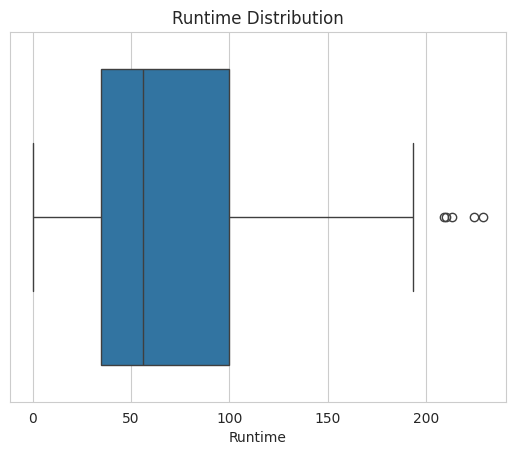

In [ ]:
# Boxplot to check the uniformity of the data to decide witch method to use
with sns.axes_style('whitegrid'):
  grafico = sns.boxplot(x=df['runtime'])
  grafico.set(title='Runtime Distribution', xlabel='Runtime')

In [ ]:
mean = df['runtime'].mean()
std = df['runtime'].std()

df['runtime_std'] = df['runtime'].apply(lambda value: (value - mean) / std)

* **IMDB Score:** Numeric attribute, standardize

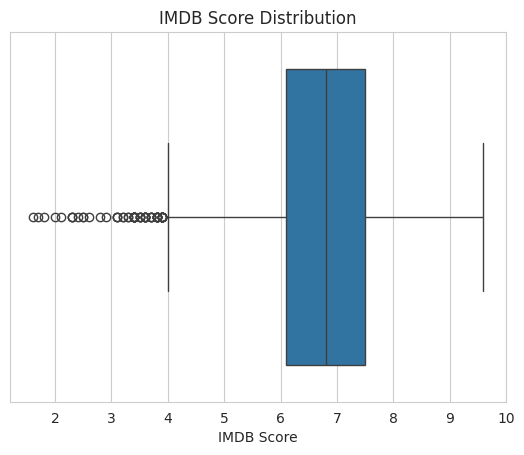

In [ ]:
# Boxplot to check the uniformity of the data.
with sns.axes_style('whitegrid'):
  grafico = sns.boxplot(x=df['imdb_score'])
  grafico.set(title='IMDB Score Distribution', xlabel='IMDB Score')

In [ ]:
mean = df['imdb_score'].mean()
std = df['imdb_score'].std()

df['imdb_score_std'] = df['imdb_score'].apply(lambda value: (value - mean) / std)

* **IMDB votes:** Numeric attribute, standardize

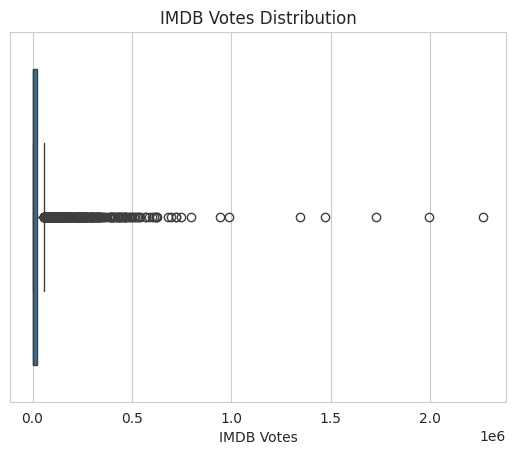

In [ ]:
# Boxplot to check the uniformity of the data.
with sns.axes_style('whitegrid'):
  grafico = sns.boxplot(x=df['imdb_votes'])
  grafico.set(title='IMDB Votes Distribution', xlabel='IMDB Votes')

In [ ]:
mean = df['imdb_votes'].mean()
std = df['imdb_votes'].std()

df['imdb_scoimdb_votes_std'] = df['imdb_votes'].apply(lambda value: (value - mean) / std)

In [ ]:
df.head()

,title,type,description,release_year,age_certification,runtime,imdb_score,imdb_votes,type_movie,type_show,age_certification_encoded,runtime_std,imdb_score_std,imdb_scoimdb_votes_std
0,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,8.3,795222.0,1,0,17,1.100732,1.388764,6.737290
1,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,8.2,530877.0,1,0,10,0.555004,1.300234,4.386564
2,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,8.0,392419.0,1,0,17,0.629422,1.123174,3.155306
3,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,8.1,391942.0,1,0,17,1.596849,1.211704,3.151064
4,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,8.8,72895.0,0,1,14,-0.958151,1.831412,0.313893


# **02. Exploratory Analysis**

## **02.1 General Distribution:**

* **Distribution of TV Shows and Movies**

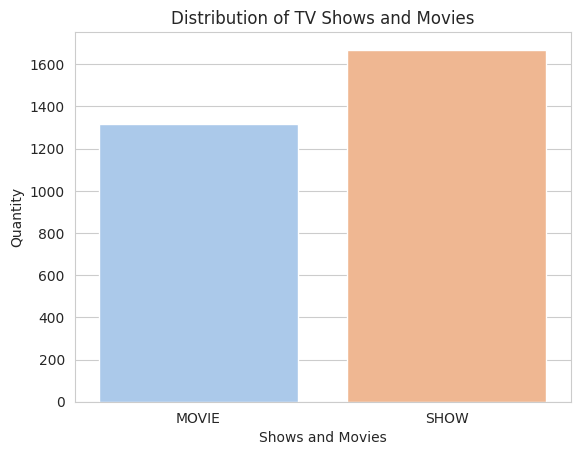

In [ ]:
# x = type, hue = type, palette = 'Paired'
with sns.axes_style('whitegrid'):
  grafico = sns.countplot(x='type', hue='type', data=df, palette='pastel')
  grafico.set(title="Distribution of TV Shows and Movies", xlabel="Shows and Movies", ylabel="Quantity")

**Comments:** Over the years, more TV shows have been made than movies.

* **IMDb Score Distribution**

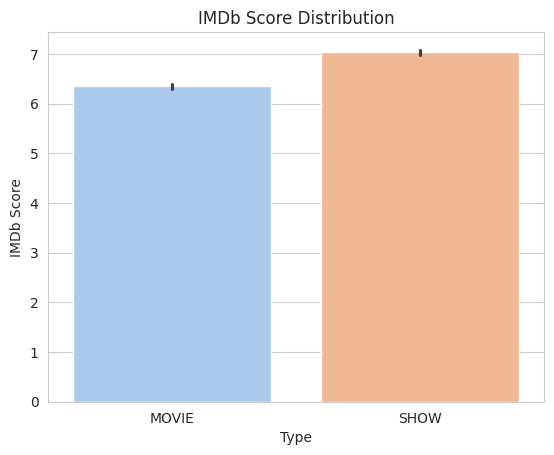

In [ ]:
with sns.axes_style('whitegrid'):
  grafico = sns.barplot(x='type', y='imdb_score', hue='type', data=df, palette='pastel')
  grafico.set(title="IMDb Score Distribution", xlabel="Type", ylabel="IMDb Score")

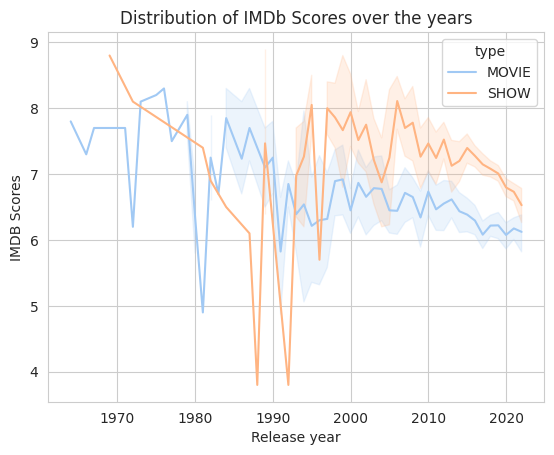

In [ ]:
with sns.axes_style('whitegrid'):
  grafico = sns.lineplot(x='release_year', y='imdb_score', hue='type', data=df, palette='pastel')
  grafico.set(title="Distribution of IMDb Scores over the years", xlabel="Release year", ylabel="IMDB Scores")

**Comments:** The average IMDb ratings for TV shows are slightly higher than those for movies. The difference between the types remains consistent over the observed years, except in the years close to the 1990s.

* **Age Certification Distribution**

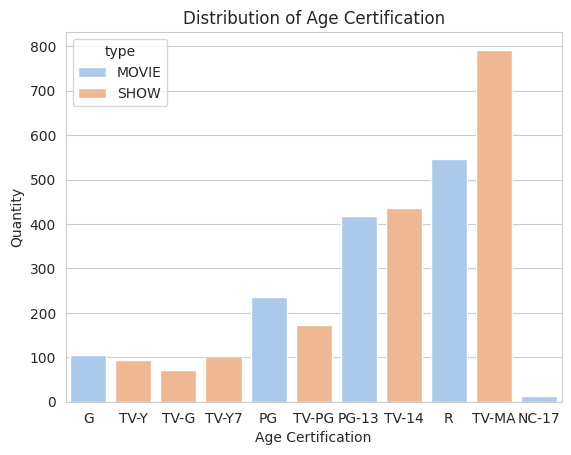

In [ ]:
with sns.axes_style('whitegrid'):
  grafico = sns.countplot(x='age_certification', hue='type', data=df, palette='pastel', order=rating_order)
  grafico.set(title="Distribution of Age Certification", xlabel="Age Certification", ylabel = "Quantity")

**Comments:** The growth in the number of movies and shows increases as the age certification becomes higher.

* **Release year Distribution**

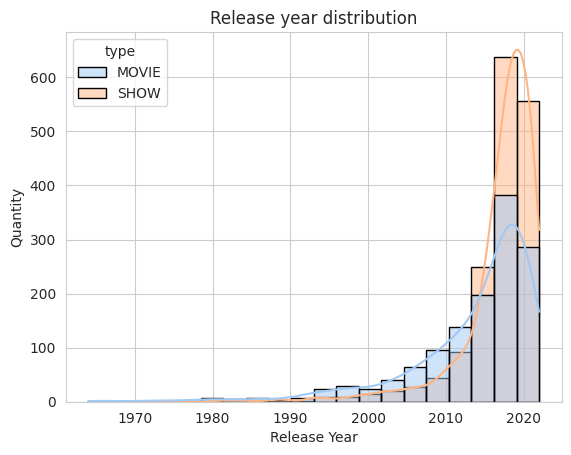

In [ ]:
with sns.axes_style('whitegrid'):
  grafico = sns.histplot(x='release_year', hue='type', bins=20, kde=True, data=df, palette="pastel", edgecolor='black')
  grafico.set(title="Release year distribution", xlabel="Release Year", ylabel="Quantity")

**Comments:** The production rate of movies and TV shows is similar and increases significantly from 2010 onward, when the production of TV shows surpasses that of movies.

* **Runtime by years**

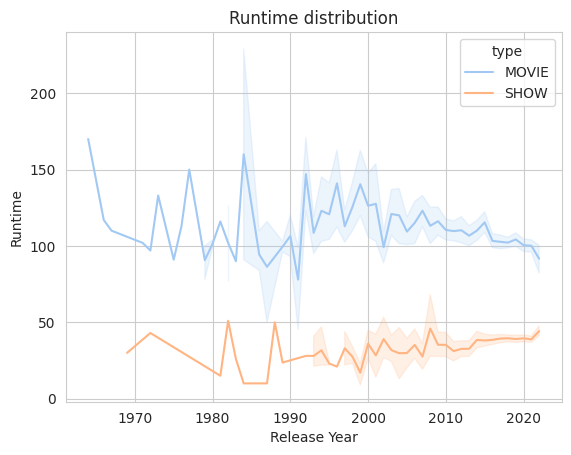

In [ ]:
with sns.axes_style('whitegrid'):
  grafico = sns.lineplot(data=df, x='release_year', y="runtime", hue='type', palette="pastel")
  grafico.set(title="Runtime distribution", xlabel="Release Year", ylabel="Runtime")

**Coments:** Movies, being self-contained stories, have more flexibility in runtime to adapt to the narrative's needs, leading to the observed volatility. In contrast, TV shows typically adhere to standard broadcast slots, resulting in more consistent episode lengths.

* **Top-10 Titles**

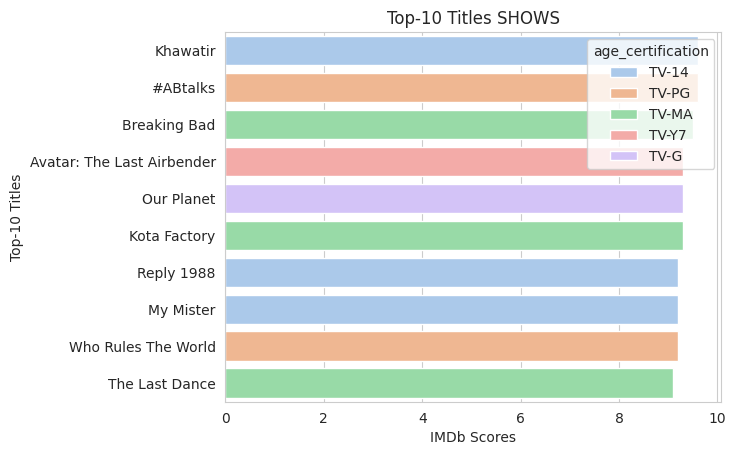

In [ ]:
top_rated = df.nlargest(10, 'imdb_score')

with sns.axes_style('whitegrid'):
  grafico = sns.barplot(x='imdb_score', y='title', data=top_rated, hue='age_certification', palette='pastel')
  grafico.set(title="Top-10 Titles SHOWS", xlabel="IMDb Scores", ylabel="Top-10 Titles")

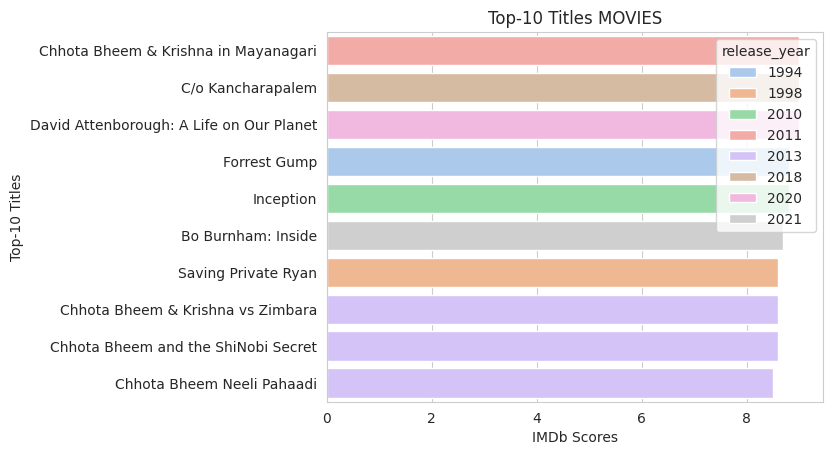

In [ ]:
top_rated = df.query('type == "MOVIE"').nlargest(10, 'imdb_score')

with sns.axes_style('whitegrid'):
  grafico = sns.barplot(x='imdb_score', y='title', data=top_rated, hue='release_year', palette='pastel')
  grafico.set(title="Top-10 Titles MOVIES", xlabel="IMDb Scores", ylabel="Top-10 Titles")

**Comments:** All of the top 10 titles are TV shows, with only 3 titles for adults.

* **Word Cloud in Description**

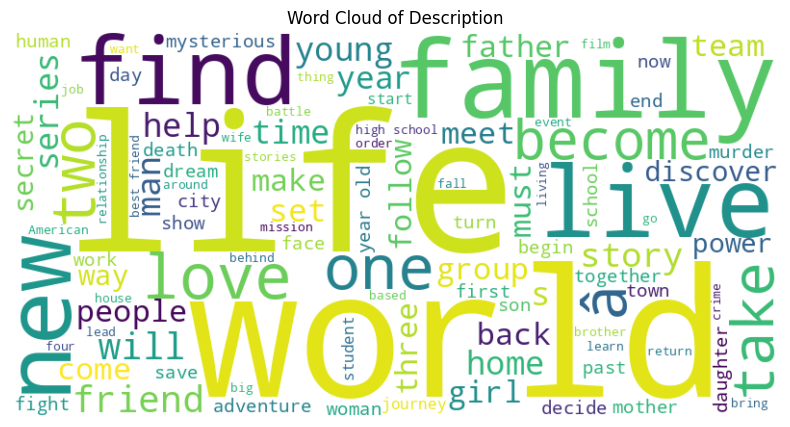

In [ ]:
text = ' '.join(df['description'].astype(str))

wordcloud = WordCloud(max_words=100, width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Description')
plt.show()

**Comments:** Terms related to family, girl, life, and love are more common, reflecting the type of stories that are most often created, that is, real stories where people see themselves.

In [ ]:
!git add .

In [ ]:
!git commit -m "Exploratory Analysis"

# **03. Tree Classifier**

In [ ]:
df.head()

In [ ]:
# Create the binary target variable.
df['target'] = (df['imdb_score'] >= 7.0).astype(int)

In [ ]:
X = df[['release_year', 'runtime', 'age_certification_encoded', 'type_movie', 'type_show']]
Y = df['target']

In [ ]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    X, Y,
    test_size=0.25,
    random_state=123
)

* **Training the model**

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
# Criar e treinar o modelo de árvore de decisão
model = model.fit(predictors_train, target_train)

In [ ]:
model.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['release_year', 'runtime', 'age_certification_encoded',
        'type_movie', 'type_show'], dtype=object),
 'n_features_in_': 5,
 'n_outputs_': 1,
 'classes_': array([0, 1]),
 'n_classes_': 2,
 'max_features_': 5,
 'tree_': <sklearn.tree._tree.Tree at 0x79e717ebb980>}

We can visualize the generated decision tree with the help of the **Python Graphviz** package.

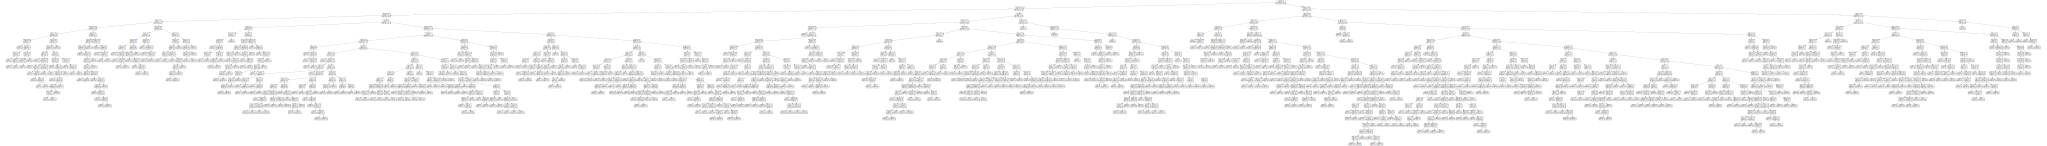

In [ ]:
tree_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(tree_data)
graph

* **Validate the model**

In [ ]:
target_predicted = model.predict(predictors_test)

print("Acuracy:", accuracy_score(target_test, target_predicted))
print(classification_report(target_test, target_predicted))

Acurácia: 0.6224899598393574
              precision    recall  f1-score   support

           0       0.66      0.65      0.65       411
           1       0.58      0.59      0.59       336

    accuracy                           0.62       747
   macro avg       0.62      0.62      0.62       747
weighted avg       0.62      0.62      0.62       747



In [ ]:
model = DecisionTreeClassifier(max_depth=5, random_state=123)
model = model.fit(predictors_train, target_train)
target_predicted = model.predict(predictors_test)
print("Acuracy:", accuracy_score(target_test, target_predicted))
print(classification_report(target_test, target_predicted))

Acuracy: 0.6706827309236948
              precision    recall  f1-score   support

           0       0.68      0.75      0.71       411
           1       0.65      0.57      0.61       336

    accuracy                           0.67       747
   macro avg       0.67      0.66      0.66       747
weighted avg       0.67      0.67      0.67       747

